<a href="https://colab.research.google.com/github/babcockt18/On-Nonlinearities-in-QML-Paper-Implementation/blob/main/QHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of *Nonlinear transformations in quantum computation*

In [ ]:
%pip install -qqq pennylane --progress-bar off

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.math import purity

In [ ]:
states = [[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]]
# instantiate Quantum Hadamard Product Circuit
dev = qml.device('default.qubit', wires=len(states), shots=None)


@qml.qnode(dev)
def qhp(states, control, target):

  qml.Hadamard(wires=[0])

  for i in range(1, len(states)):
    qml.Hadamard(wires=[i])
    qml.CNOT(wires=[0, i])
    qml.Projector([0], wires=[i])

  return qml.density_matrix(wires=[0])

In [ ]:
print('The matrix output is: {0}'.format(qhp(states, 0,1)))

The matrix output is: [[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]


In [ ]:
# 4-qubit input state
states = [[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]]

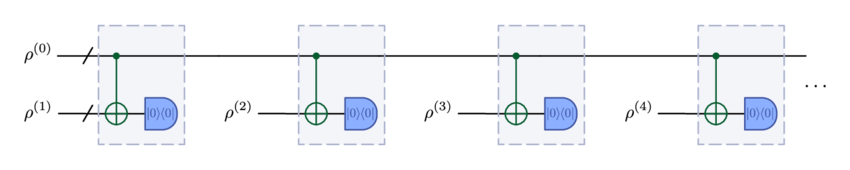

In [ ]:
# Define the power to raise the nonlinearity
k = 8

# instantiate Iterated Quantum Hadamard Product Circuit
dev = qml.device('default.mixed', wires=5, shots=1000)

@qml.qnode(dev)
def circuit(states, k):
    qml.QubitStateVector(states[0], wires=[0])
    for j in range(k):
      for i in range(1, len(states)):
          qml.QubitStateVector(states[i], wires=[i])
          qml.CNOT(wires=[0, i])
          # qml.Projector([0], wires=[i])

    return qml.density_matrix(wires=[0])

In [ ]:
print('The matrix output is: {0}'.format(circuit(states, k)))

The matrix output is: [[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]


/usr/local/lib/python3.10/dist-packages/pennylane/_qubit_device.py:656: UserWarning: Requested state or density matrix with finite shots; the returned state information is analytic and is unaffected by sampling. To silence this warning, set shots=None on the device.
  warnings.warn(


In [ ]:
-7.70371978e-34

-7.70371978e-34

In [ ]:
# Absolute Sampling Error
absolute_sampling_error = np.array([np.sqrt(circuit(states, i)[1]) for i in range(2,10)])

expected_values = np.array([circuit(states, i) for i in range(2,10)])

# Relative Error
relative_error = np.array([np.sqrt(circuit(states, i)[1]) / circuit(states, i)[0] for i in range(2,10)])

print(expected_values)

[[[ 5.00000000e-01+0.j -7.70371978e-34+0.j]
  [ 7.70371978e-34+0.j  5.00000000e-01+0.j]]

 [[ 5.00000000e-01+0.j  1.38777878e-17+0.j]
  [ 1.38777878e-17+0.j  5.00000000e-01+0.j]]

 [[ 5.00000000e-01+0.j -5.00000000e-01+0.j]
  [-5.00000000e-01+0.j  5.00000000e-01+0.j]]

 [[ 5.00000000e-01+0.j -5.00000000e-01+0.j]
  [-5.00000000e-01+0.j  5.00000000e-01+0.j]]

 [[ 5.00000000e-01+0.j -4.85722573e-17+0.j]
  [ 5.55111512e-17+0.j  5.00000000e-01+0.j]]

 [[ 5.00000000e-01+0.j -2.77555756e-17+0.j]
  [-2.77555756e-17+0.j  5.00000000e-01+0.j]]

 [[ 5.00000000e-01+0.j  5.00000000e-01+0.j]
  [ 5.00000000e-01+0.j  5.00000000e-01+0.j]]

 [[ 5.00000000e-01+0.j  5.00000000e-01+0.j]
  [ 5.00000000e-01+0.j  5.00000000e-01+0.j]]]


In [ ]:
print(relative_error)

[[ 5.55111512e-17+0.00000000e+00j -9.17877080e+32-0.00000000e+00j]
 [ 7.45058060e-09+0.00000000e+00j  5.09524134e+16+0.00000000e+00j]
 [ 0.00000000e+00+1.41421356e+00j -1.41421356e+00-0.00000000e+00j]
 [ 0.00000000e+00+1.41421356e+00j -1.41421356e+00-0.00000000e+00j]
 [ 1.49011612e-08+0.00000000e+00j -1.45578324e+16-0.00000000e+00j]
 [ 0.00000000e+00+1.05367121e-08j -2.54762067e+16-0.00000000e+00j]
 [ 1.41421356e+00+0.00000000e+00j  1.41421356e+00+0.00000000e+00j]
 [ 1.41421356e+00+0.00000000e+00j  1.41421356e+00+0.00000000e+00j]]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


ValueError: ignored

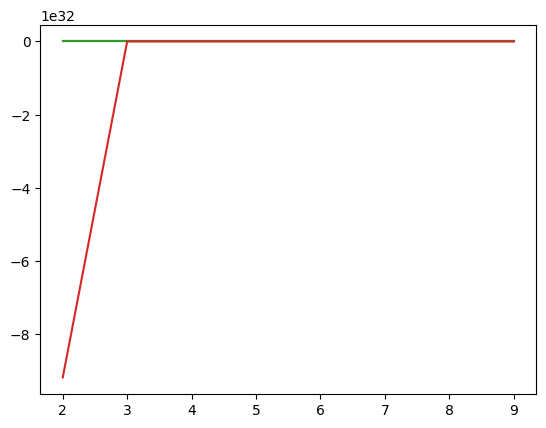

In [ ]:
import matplotlib.pyplot as plt

powers_k = np.array([2,3,4,5,6,7,8,9])

# Powers of K vs Absolute Sampling Error
plt.plot(powers_k, absolute_sampling_error)

# Powers of K vs Relative Error
plt.plot(powers_k, relative_error)

# Powers of K vs Expectation Value
plt.plot(powers_k, expected_values)